In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy import stats
import matplotlib.pyplot as plt


In [45]:
df= pd.read_csv('/Users/atharvakhodke/Documents/PICT/PICT BE sem 7/lab submitions/practice/kishanlal/ML/datasets/uber.csv')


In [46]:
df.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,49:00.0,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,09:00.0,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,42:00.0,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,56:25.0,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695416,1
199999,11951496,08:00.0,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [47]:
df.dropna(inplace=True)

In [48]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [49]:
df.drop(['Unnamed: 0','key'],axis=1,inplace=True)

In [50]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [51]:
df['hour']=df['pickup_datetime'].dt.hour
df['day']=df['pickup_datetime'].dt.day
df['day_of_week']=df['pickup_datetime'].dt.day_of_week
df['isweekend']=df['day_of_week'].isin([5,6]).astype(int)


In [91]:
# Identify incorrect latitude and longitude values
incorrect_coordinates = df.loc[
    (df.pickup_latitude > 90) | (df.pickup_latitude < -90) |
    (df.dropoff_latitude > 90) | (df.dropoff_latitude < -90) |
    (df.pickup_longitude > 180) | (df.pickup_longitude < -180) |
    (df.fare_amount < 0) |
    (df.dropoff_longitude > 180) | (df.dropoff_longitude < -180) 
]

# Drop rows with incorrect coordinates
df.drop(incorrect_coordinates.index, inplace=True)


In [92]:
import haversine as hs

# Calculate the travel distance for each row using the haversine formula
travel_dist = []
for pos in range(len(df)):
    long1, lati1 = df.iloc[pos]['pickup_longitude'], df.iloc[pos]['pickup_latitude']
    long2, lati2 = df.iloc[pos]['dropoff_longitude'], df.iloc[pos]['dropoff_latitude']
    loc1 = (lati1, long1)
    loc2 = (lati2, long2)
    c = hs.haversine(loc1, loc2)
    travel_dist.append(c)

# Add the calculated distances to a new column in the DataFrame
df['dist_travel_km'] = travel_dist
print(df['dist_travel_km'])


KeyboardInterrupt: 

In [93]:
from geopy.distance import geodesic

def calculate_distance(row):
    start = (row['pickup_latitude'], row['pickup_longitude'])
    end = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(start, end).kilometers

# Apply the function to calculate distances for each row
df['distance'] = df.apply(calculate_distance, axis=1)

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
day_of_week             Axes(0.125,0.335366;0.352273x0.0939024)
isweekend            Axes(0.547727,0.335366;0.352273x0.0939024)
dist_travel_km          Axes(0.125,0.222683;0.352273x0.0939024)
distance             Axes(0.547727,0.222683;0.352273x0.0939024)
dtype: object

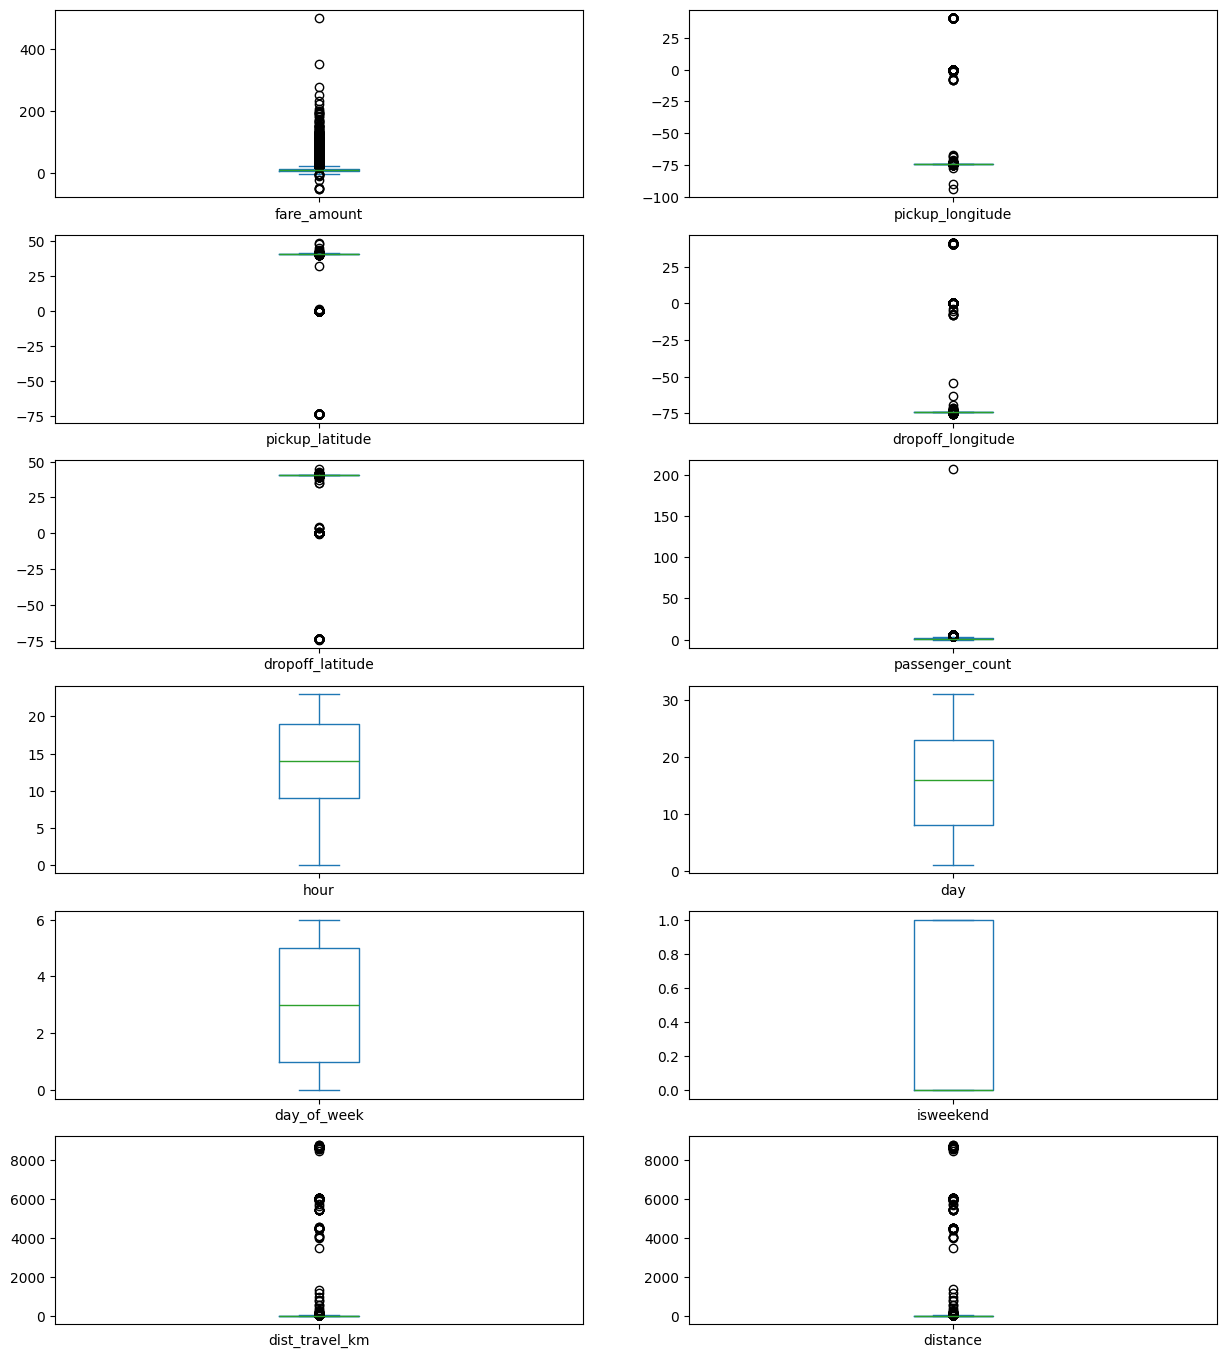

In [84]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxp

In [94]:
df1=df.drop(['pickup_datetime'],axis=1)
df1[(np.abs(stats.zscore(df1)) < 3).all(axis=1)]


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,day_of_week,isweekend,dist_travel_km,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,3,0,1.683325,1.681111
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,4,0,2.457593,2.454363
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,0,0,5.036384,5.039603
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,4,0,1.661686,1.661442
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,3,0,4.475456,4.483730
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,28,6,1,0.112210,0.112128
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,14,4,0,1.875053,1.879635
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,29,0,0,12.850337,12.867916
199998,14.5,-73.997124,40.725452,-73.983215,40.695416,1,14,20,2,0,3.539720,3.536552


In [72]:
df1.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,day_of_week,isweekend,dist_travel_km,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,3,0,1.683325,1.681111
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,4,0,2.457593,2.454363
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,0,0,5.036384,5.039603
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,4,0,1.661686,1.661442
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,3,0,4.475456,4.483730


In [73]:
df1.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'day_of_week', 'isweekend', 'dist_travel_km', 'distance'],
      dtype='object')

In [78]:
x=df[[ 'distance', 'passenger_count', 'hour',
       'day', 'isweekend']]
y=df['fare_amount']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [80]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [81]:
# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [104]:
# Evaluation
metrics = {
    'Linear Regression': {
        'R2': r2_score(y_test, y_pred_lr),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        'MAE': mean_absolute_error(y_test, y_pred_lr)
    },
    'Random Forest Regression': {
        'R2': r2_score(y_test, y_pred_rf),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        'MAE': mean_absolute_error(y_test, y_pred_rf)
    }
}

# Compare results
print(metrics['Linear Regression'])
print(metrics['Random Forest Regression'])

{'R2': 0.0013406517178284894, 'RMSE': 9.572902210618032, 'MAE': 5.995040532444939}
{'R2': 0.6825631269618393, 'RMSE': 5.397139244407228, 'MAE': 2.629567818154483}


In [ ]:
# Linear Regression:

# R²: 0.0013 — This very low value means the model explains only about 0.13% of the variance in fare prediction, indicating a poor fit.
# RMSE: 9.57 — This indicates that the model’s predictions deviate from actual fare values by about $9.57 on average.
# MAE: 5.99 — The average absolute error is around $5.99, suggesting that the model may have larger errors on some predictions.
# Random Forest Regression:

# R²: 0.6826 — This higher value indicates that the model explains about 68% of the variance in fare prediction, suggesting a much better fit.
# RMSE: 5.40 — This shows a lower deviation from actual fare values, with average error around $5.40.
# MAE: 2.63 — With an average absolute error of about $2.63, this suggests more consistent accuracy in the model’s predictions.


In [115]:
from IPython.display import display, Markdown

text = r"""
### 1. **R² (Coefficient of Determination)**
- **What it is**: Measures how well the model explains the variance in the target variable.
- **Usage**: Indicates the proportion of variance explained by the model; a higher value (closer to 1) means the model fits the data better.
- **Formula**: 
  \[
  R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
  \]
  where \( \text{SS}_{\text{res}} \) is the sum of squared residuals, and \( \text{SS}_{\text{tot}} \) is the total sum of squares.

### 2. **MSE (Mean Squared Error)**
- **What it is**: The average of the squared differences between predicted and actual values.
- **Usage**: Evaluates the model's accuracy by penalizing larger errors more heavily; lower values indicate better model performance.
- **Formula**: 
  \[
  \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
  \]
  where \( y_i \) is the actual value and \( \hat{y}_i \) is the predicted value.

### 3. **RMSE (Root Mean Squared Error)**
- **What it is**: The square root of the MSE, providing error in the same units as the target variable.
- **Usage**: Like MSE but more interpretable as it is in the same units as the output variable; lower RMSE indicates better performance.
- **Formula**:
  \[
  \text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}
  \]

### 4. **MAE (Mean Absolute Error)**
- **What it is**: The average of the absolute differences between predicted and actual values.
- **Usage**: Measures the model's average error in absolute terms; less sensitive to outliers compared to MSE or RMSE.
- **Formula**:
  \[
  \text{MAE} = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|
  \] 
"""

display(Markdown(text))



### 1. **R² (Coefficient of Determination)**
- **What it is**: Measures how well the model explains the variance in the target variable.
- **Usage**: Indicates the proportion of variance explained by the model; a higher value (closer to 1) means the model fits the data better.
- **Formula**: 
  \[
  R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
  \]
  where \( \text{SS}_{\text{res}} \) is the sum of squared residuals, and \( \text{SS}_{\text{tot}} \) is the total sum of squares.

### 2. **MSE (Mean Squared Error)**
- **What it is**: The average of the squared differences between predicted and actual values.
- **Usage**: Evaluates the model's accuracy by penalizing larger errors more heavily; lower values indicate better model performance.
- **Formula**: 
  \[
  \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
  \]
  where \( y_i \) is the actual value and \( \hat{y}_i \) is the predicted value.

### 3. **RMSE (Root Mean Squared Error)**
- **What it is**: The square root of the MSE, providing error in the same units as the target variable.
- **Usage**: Like MSE but more interpretable as it is in the same units as the output variable; lower RMSE indicates better performance.
- **Formula**:
  \[
  \text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}
  \]

### 4. **MAE (Mean Absolute Error)**
- **What it is**: The average of the absolute differences between predicted and actual values.
- **Usage**: Measures the model's average error in absolute terms; less sensitive to outliers compared to MSE or RMSE.
- **Formula**:
  \[
  \text{MAE} = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|
  \] 


In [7]:
method_list = [func for func in dir(pd) if callable(getattr(pd, func))]
print(method_list)

['ArrowDtype', 'BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Flags', 'Float32Dtype', 'Float64Dtype', 'Grouper', 'HDFStore', 'Index', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt8Dtype', 'array', 'bdate_range', 'concat', 'crosstab', 'cut', 'date_range', 'describe_option', 'eval', 'factorize', 'from_dummies', 'get_dummies', 'get_option', 'infer_freq', 'interval_range', 'isna', 'isnull', 'json_normalize', 'lreshape', 'melt', 'merge', 'merge_asof', 'merge_ordered', 'notna', 'notnull', 'option_context', 'period_range', 'pivot', 'pivot_table', 'qcut', 'read_clipboard', 'read_csv', 'read_excel', 'read_feather', 

In [19]:

print(dir(pd))

['ArrowDtype', 'BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Flags', 'Float32Dtype', 'Float64Dtype', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt8Dtype', '__all__', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_built_with_meson', '_config', '_is_numpy_dev', '_libs', '_pandas_datetime_CAPI', '_pandas_parser_CAPI', '_testing', '_typing', '_version_meson', 'annotations', 'api', 'array', 'arrays', 'bdate_range', 'compat', 'conca

In [18]:
print(pd.read_csv.__code__.co_varnames)

('filepath_or_buffer', 'sep', 'delimiter', 'header', 'names', 'index_col', 'usecols', 'dtype', 'engine', 'converters', 'true_values', 'false_values', 'skipinitialspace', 'skiprows', 'skipfooter', 'nrows', 'na_values', 'keep_default_na', 'na_filter', 'verbose', 'skip_blank_lines', 'parse_dates', 'infer_datetime_format', 'keep_date_col', 'date_parser', 'date_format', 'dayfirst', 'cache_dates', 'iterator', 'chunksize', 'compression', 'thousands', 'decimal', 'lineterminator', 'quotechar', 'quoting', 'doublequote', 'escapechar', 'comment', 'encoding', 'encoding_errors', 'dialect', 'on_bad_lines', 'delim_whitespace', 'low_memory', 'memory_map', 'float_precision', 'storage_options', 'dtype_backend', 'depr', 'kwds', 'kwds_defaults')
